In [1]:
#!/usr/bin/env python3
# !conda install requests
# !pip install fmpsdk
# !pip install requests

import os
import typing

from dotenv import load_dotenv

import fmpsdk

import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Actual API key is stored in a .env file.  Not good to store API key directly in script.
load_dotenv()
apikey = os.environ.get("apikey")


In [3]:
# Company Valuation Methods
symbol: str = "AAPL"
symbols: typing.List[str] = ["AAPL", "GOOG","CSCO", "DKS", "HD"]
exchange: str = "NYSE"
exchanges: typing.List[str] = ["NYSE", "NASDAQ"]
query: str = "AA"
limit: int = 3
period: str = "quarter"
download: bool = True
market_cap_more_than: int = 1000000000
beta_more_than: int = 1
volume_more_than: int = 10000
sector: str = "Technology"
dividend_more_than: int = 0
industry: str = "Software"
filing_type: str = "10-K"

In [4]:
print(f"Company Profile: {fmpsdk.company_profile(apikey=apikey, symbol=symbol)=}")

Company Profile: fmpsdk.company_profile(apikey=apikey, symbol=symbol)=[{'symbol': 'AAPL', 'price': 141.11, 'beta': 1.222222, 'volAvg': 81839761, 'mktCap': 2332576448512, 'lastDiv': 0.85, 'range': '107.32-157.26', 'changes': 1.9700012, 'companyName': 'Apple Inc.', 'currency': 'USD', 'cik': '0000320193', 'isin': 'US0378331005', 'cusip': '037833100', 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Consumer Electronics', 'website': 'http://www.apple.com', 'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support s

In [5]:
fmpsdk.quote(apikey=apikey, symbol=symbol)

[{'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'price': 141.11,
  'changesPercentage': 1.415841,
  'change': 1.9700012,
  'dayLow': 139.36,
  'dayHigh': 142.24,
  'yearHigh': 157.26,
  'yearLow': 107.32,
  'marketCap': 2332576448512.0,
  'priceAvg50': 147.93,
  'priceAvg200': 137.53094,
  'volume': 80861062,
  'avgVolume': 81839761,
  'exchange': 'NASDAQ',
  'open': 139.49,
  'previousClose': 139.14,
  'eps': 5.108,
  'pe': 27.625296,
  'earningsAnnouncement': '2021-07-27T16:30:00.000+0000',
  'sharesOutstanding': 16530199479,
  'timestamp': 1633522811}]

In [31]:
df_income = []
for symbol in symbols:
    df_income = df_income + fmpsdk.income_statement(apikey=apikey, symbol=symbol)

df_income = pd.DataFrame(df_income)

df_income['date']= pd.to_datetime(df_income['date'])
df_income.set_index(['symbol','date'],inplace=True)
df_income.sort_values(by=['symbol','date'],inplace=True)

df_income.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [32]:
df_balance = []
for symbol in symbols:
    df_balance = df_balance + fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)

df_balance = pd.DataFrame(df_balance)

df_balance['date']= pd.to_datetime(df_balance['date'])
df_balance.set_index(['symbol','date'],inplace=True)
df_balance.sort_values(by=['symbol','date'],inplace=True)

df_balance.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockhol

In [33]:
df_cashflow = []
for symbol in symbols:
    df_cashflow = df_cashflow + fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol)

df_cashflow = pd.DataFrame(df_cashflow)

df_cashflow['date']= pd.to_datetime(df_cashflow['date'])
df_cashflow.set_index(['symbol','date'],inplace=True)
df_cashflow.sort_values(by=['symbol','date'],inplace=True)

df_cashflow.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'netIncome', 'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='object')

In [34]:
df_keymetrics = []
for symbol in symbols:
    df_keymetrics = df_keymetrics + fmpsdk.key_metrics(apikey=apikey, symbol=symbol)

df_keymetrics = pd.DataFrame(df_keymetrics)

df_keymetrics['date']= pd.to_datetime(df_keymetrics['date'])
df_keymetrics.set_index(['symbol','date'],inplace=True)
df_keymetrics.sort_values(by=['symbol','date'],inplace=True)
df_keymetrics.columns

Index(['period', 'revenuePerShare', 'netIncomePerShare',
       'operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare',
       'bookValuePerShare', 'tangibleBookValuePerShare',
       'shareholdersEquityPerShare', 'interestDebtPerShare', 'marketCap',
       'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio',
       'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales',
       'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
   

In [9]:
moat_columns = ["EV+Div","Earnings","Sales","Cash"]
df_moat_perShare = pd.DataFrame(index=df_balance.index,columns=moat_columns)
df_moat_perShare["Sales"]=df_income['revenue']/df_income['weightedAverageShsOutDil']
df_moat_perShare["Earnings"]=df_income['netIncome']/df_income['weightedAverageShsOutDil']
df_moat_perShare["EV+Div"]=(df_balance['totalStockholdersEquity']+df_cashflow['dividendsPaid'].fillna(0))/df_income['weightedAverageShsOutDil']
df_moat_perShare["Cash"]=(df_cashflow['operatingCashFlow'])/df_income['weightedAverageShsOutDil']
df_moat_perShare.sort_values(by=['symbol','date'],inplace=True)
df_moat_perShare

EV+Div   Earnings       Sales       Cash
symbol date                                                    
AAPL   2011-09-24    2.921331   0.988406    4.127536   1.430981
       2012-09-29    4.371827   1.576619    5.912669   1.921274
       2013-09-28    4.331161   1.419775    6.551656   2.057230
       2014-09-27    4.100381   1.613269    7.463868   2.438196
       2015-09-26    4.651852   2.304219   10.085975   3.507036
       2016-09-24    5.276958   2.076576    9.801272   3.010346
       2017-09-30    5.773282   2.301687   10.912388   3.027500
       2018-09-29    4.671648   2.976485   13.279461   3.871616
       2019-09-28    4.106820   2.971447   13.991120   3.731571
       2020-09-26    2.924314   3.275348   15.661322   4.602523
CSCO   2017-07-29   12.007526   1.903149    9.507823   2.748267
       2018-07-28    7.628765   0.022536   10.106536   2.799836
       2019-07-27    6.196272   2.609701   11.655962   3.555131
       2020-07-25    7.520981   2.643564   11.622112   3.636492
       2021-07-31    8.288952   2.500236   11.760623   3.648253
DKS    2017-01-28   16.588695   2.561096   70.595824   6.763590
       2018-02-03   17.366590   3.006386   79.847489   6.936869
       2019-02-02   18.372845   3.238113   85.406809   7.215507
       2020-02-01   18.337929   3.339793   98.250095   4.542833
       2021-01-30   24.094928   5.723842  103.455553  16.761504
GOOG   2016-12-31  198.990706  27.877247  129.198833  51.575341
       2017-12-31  216.750239  17.996430  157.557591  52.717231
       2018-12-31  252.569015  43.703477  194.542753  68.209901
       2019-12-31  290.874670  49.590000  233.715419  78.724829
       2020-12-31  326.888614  59.150000  268.108770  95.658810
HD     2017-01-29    0.752836   6.448136   76.657212   7.927877
       2018-01-28   -2.329392   7.288851   85.222973  10.161318
       2019-02-03   -5.758530   9.729659   94.665792  11.406824
       2020-02-02   -8.425255  10.438254  102.344475  12.741876
       2021-01-31   -2.923933  11.935065  122.551020  17.475881

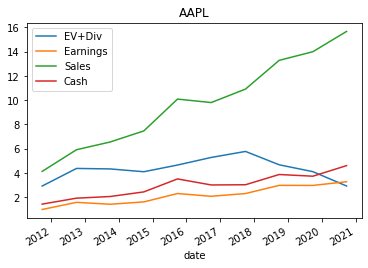

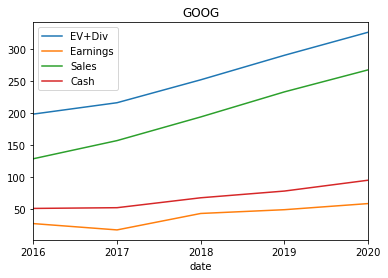

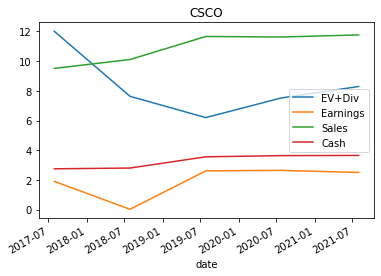

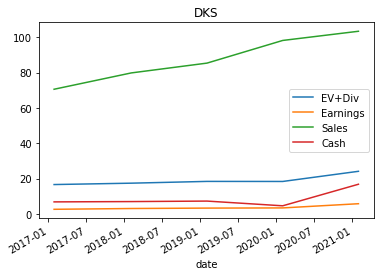

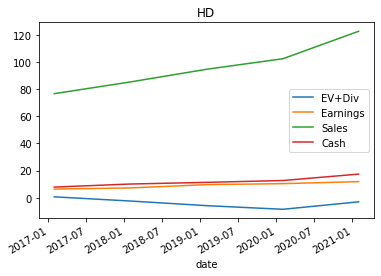

In [10]:
for symbol in symbols:
    df_moat_perShare.loc[symbol].plot(title=symbol)

In [11]:
df_moat_pct_chg = df_moat_perShare.copy()
df_moat_pct_chg = df_moat_pct_chg.pct_change()
df_moat_pct_chg

EV+Div    Earnings     Sales      Cash
symbol date                                                
AAPL   2011-09-24       NaN         NaN       NaN       NaN
       2012-09-29  0.496519    0.595112  0.432494  0.342627
       2013-09-28 -0.009302   -0.099481  0.108071  0.070764
       2014-09-27 -0.053284    0.136285  0.139234  0.185184
       2015-09-26  0.134493    0.428292  0.351307  0.438373
       2016-09-24  0.134378   -0.098794 -0.028228 -0.141627
       2017-09-30  0.094055    0.108405  0.113364  0.005698
       2018-09-29 -0.190816    0.293176  0.216916  0.278816
       2019-09-28 -0.120905   -0.001693  0.053591 -0.036172
       2020-09-26 -0.287937    0.102274  0.119376  0.233401
CSCO   2017-07-29  3.106100   -0.418947 -0.392911 -0.402878
       2018-07-28 -0.364668   -0.988158  0.062970  0.018764
       2019-07-27 -0.187775  114.799565  0.153309  0.269764
       2020-07-25  0.213791    0.012976 -0.002904  0.022885
       2021-07-31  0.102111   -0.054218  0.011918  0.003234
DKS    2017-01-28  1.001302    0.024342  5.002728  0.853926
       2018-02-03  0.046893    0.173867  0.131051  0.025619
       2019-02-02  0.057942    0.077078  0.069624  0.040168
       2020-02-01 -0.001900    0.031401  0.150378 -0.370407
       2021-01-30  0.313939    0.713831  0.052982  2.689659
GOOG   2016-12-31  7.258614    3.870373  0.248834  2.077011
       2017-12-31  0.089248   -0.354440  0.219497  0.022140
       2018-12-31  0.165254    1.428453  0.234741  0.293882
       2019-12-31  0.151664    0.134692  0.201358  0.154155
       2020-12-31  0.123813    0.192781  0.147159  0.215103
HD     2017-01-29 -0.997697   -0.890987 -0.714082 -0.917123
       2018-01-28 -4.094155    0.130381  0.111741  0.281720
       2019-02-03  1.472117    0.334869  0.110801  0.122573
       2020-02-02  0.463091    0.072828  0.081114  0.117040
       2021-01-31 -0.652956    0.143397  0.197437  0.371531

In [21]:
mgt_columns = ("ROIC","ROE","LTD-to-FCF")
mgt_col_limits = (0.1,0.1,3)
df_mgt = pd.DataFrame(index=df_balance.index,columns=mgt_columns)
df_mgt["ROIC"]=df_keymetrics["roic"]#(df_income['operatingIncome']*(1+df_income['incomeTaxExpense']/df_income['incomeBeforeTax']))/( (df_balance['longTermDebt'] + df_balance['shortTermDebt'] + df_balance['totalStockholdersEquity']))
df_mgt["ROE"]=df_keymetrics["roe"]#df_income['netIncome']/df_balance['totalStockholdersEquity']
df_mgt["LTD-to-FCF"]=df_balance['longTermDebt']/df_cashflow['freeCashFlow']
df_mgt

ROIC       ROE  LTD-to-FCF
symbol date                                      
AAPL   2020-09-26  0.303383  0.878664    1.344878
       2019-09-28  0.274616  0.610645    1.558799
       2018-09-29  0.284892  0.555601    1.461846
       2017-09-30  0.223471  0.360702    1.913411
       2016-09-24  0.247338  0.356237    1.409930
       2015-09-26  0.339619  0.447355    0.764267
       2014-09-27  0.311792  0.354200    0.580902
       2013-09-28  0.299978  0.299776    0.380354
       2012-09-29  0.401688  0.353041    0.000000
       2011-09-24  0.382235  0.338341    0.000000
GOOG   2020-12-31  0.156875  0.180948    0.325187
       2019-12-31  0.148387  0.170486    0.147036
       2018-12-31  0.138889  0.173036    0.175718
       2017-12-31  0.151220  0.083028    0.166018
       2016-12-31  0.157329  0.140093    0.152378
CSCO   2021-07-31  0.192574  0.256596    0.610893
       2020-07-25  0.195909  0.295728    0.789984
       2019-07-27  0.215175  0.346162    0.970044
       2018-07-28  0.150571  0.002546    1.584398
       2017-07-29  0.117113  0.145289    1.992333
DKS    2021-01-30  0.142519  0.226648    2.015290
       2020-02-01  0.089935  0.171785    1.205805
       2019-02-02  0.165790  0.167982    0.106467
       2018-02-03  0.176174  0.166595    0.222848
       2017-01-28  0.169062  0.148949    0.014290
HD     2021-01-31  0.385490  3.899970    2.187469
       2020-02-02  0.482122 -3.607831    2.595745
       2019-02-03  0.569135 -5.921725    2.529917
       2018-01-28  0.518122  5.935351    2.394612
       2017-01-29  0.465682  1.836372    2.738177

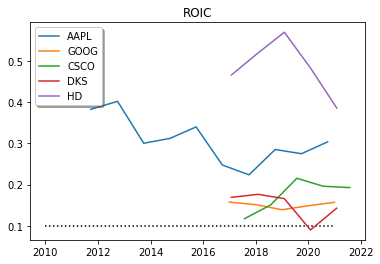

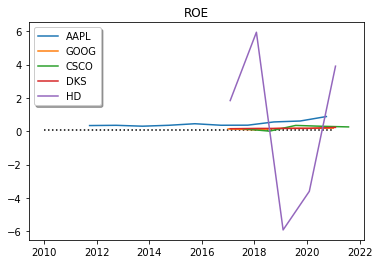

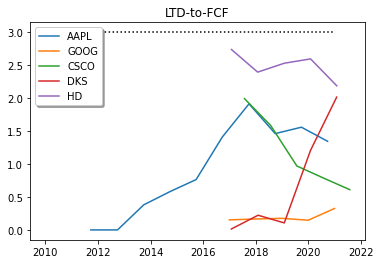

In [20]:
fig = []
ax = []

for column in mgt_columns:
  idx = mgt_columns.index(column)
  fig.append(idx)
  ax.append(idx)
  fig[idx], ax[idx] = plt.subplots()
  for symbol in symbols:
    ax[idx].plot(df_mgt.loc[symbol][column],label=symbol)
  plt.hlines(mgt_col_limits[idx], xmin=datetime.datetime(2010,1,1), xmax=datetime.datetime(2020,12,31), linestyle = 'dotted',colors='k')
  legend = ax[idx].legend(loc='best', shadow=True)
  plt.title(column)
plt.show()

In [25]:
def rolling_10(df):
  return df.rolling(window=10,min_periods=1).mean()

In [74]:
REVENUE = 'revenue'
CHG_FIX_ASSETS_INT = 'investmentsInPropertyPlantAndEquipment'
NET_CASH_OPS = 'netCashProvidedByOperatingActivities'
SHARES_DILUTED = 'weightedAverageShsOutDil'
FCF = 'freeCashFlow'

In [57]:
df_computed.groupby('symbol')['PPE/Sales'].rolling(10,min_periods=1).mean().reset_index(0,drop=True)

symbol  date      
AAPL    2011-09-24    0.039354
        2012-09-29    0.046177
        2013-09-28    0.046709
        2014-09-27    0.048122
        2015-09-26    0.048122
        2016-09-24    0.049944
        2017-09-30    0.050568
        2018-09-29    0.050513
        2019-09-28    0.049382
        2020-09-26    0.047107
CSCO    2017-07-29    0.020081
        2018-07-28    0.018494
        2019-07-27    0.018167
        2020-07-25    0.017530
        2021-07-31    0.016802
DKS     2017-01-28    0.053259
        2018-02-03    0.054239
        2019-02-02    0.043991
        2020-02-01    0.039206
        2021-01-30    0.031365
GOOG    2016-12-31    0.113125
        2017-12-31    0.116027
        2018-12-31    0.138598
        2019-12-31    0.140320
        2020-12-31    0.136670
HD      2017-01-29    0.017136
        2018-01-28    0.017968
        2019-02-03    0.019502
        2020-02-02    0.020700
        2021-01-31    0.016560
Name: PPE/Sales, dtype: float64

In [66]:
df_computed.groupby('symbol')['Sales'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])#-df_computed.groupby('symbol')['Sales'].shift(periods=1)

symbol  symbol  date      
AAPL    AAPL    2011-09-24             NaN
                2012-09-29    4.825900e+10
                2013-09-28    1.440200e+10
                2014-09-27    1.188500e+10
                2015-09-26    5.092000e+10
                2016-09-24   -1.807600e+10
                2017-09-30    1.359500e+10
                2018-09-29    3.636100e+10
                2019-09-28   -5.421000e+09
                2020-09-26    1.434100e+10
CSCO    CSCO    2017-07-29             NaN
                2018-07-28    1.325000e+09
                2019-07-27    2.574000e+09
                2020-07-25   -2.603000e+09
                2021-07-31    5.170000e+08
DKS     DKS     2017-01-28             NaN
                2018-02-03    6.684910e+08
                2019-02-02   -1.539020e+08
                2020-02-01    3.141730e+08
                2021-01-30    8.332760e+08
GOOG    GOOG    2016-12-31             NaN
                2017-12-31    2.058300e+10
                2018-12-31 

In [76]:
computed_columns = ['Sales','Sales_1y_change','PPE', 'PPE_1y_change','Cash_Ops','Shares_Diluted','PPE/Sales','PPE/Sales_10y_mean','Growth_Capex','Maint_Capex','Owner_Earnings','Owner_Earnings_per_share','10Cap'
                    ,'FCF', 'FCF_per_share','Windage_Growth_Rate','Payback_Time'
                    ,'Default_PE','PE','PE_10y_mean','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']
target_ROR = 0.15
df_computed = pd.DataFrame(index=df_income.index,columns=computed_columns)

# for 10 Cap calculation
df_computed['Sales'] = df_income[REVENUE]
df_computed['Sales_1y_change']= df_computed.groupby('symbol')['Sales'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True)
df_computed['PPE'] = -df_cashflow[CHG_FIX_ASSETS_INT]
df_computed['PPE_1y_change'] = df_computed.groupby('symbol')['PPE'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True)
df_computed['Cash_Ops'] = df_cashflow[NET_CASH_OPS]
df_computed['Shares_Diluted'] = df_income[SHARES_DILUTED]
df_computed['PPE/Sales'] = df_computed['PPE']/df_computed['Sales']
df_computed['PPE/Sales_10y_mean'] = df_computed.groupby('symbol')['PPE/Sales'].rolling(10,min_periods=1).mean().reset_index(0,drop=True)#df.apply(df=df_computed['PPE/Sales'],func=rolling10)#df_computed['PPE/Sales'].rolling(window=10,min_periods=1).mean()
# for ticker in tickers:
# #  df_computed.loc[ticker,'PPE/Sales_10y_mean'] = df_computed.loc[ticker]['PPE/Sales'].rolling(window=10,min_periods=1).mean()#df_computed.loc[ticker][-10:]['PPE/Sales'].mean()
#   df_computed.loc[ticker,'Windage_Growth_Rate'] = df_moat.loc[ticker,10]['EV+Div']
df_computed['Growth_Capex'] = df_computed['Sales_1y_change'] * df_computed['PPE/Sales_10y_mean']
df_computed['Maint_Capex'] = df_computed['PPE'] - df_computed['Growth_Capex']
df_computed['Owner_Earnings'] = df_computed['Cash_Ops'] - df_computed['Maint_Capex']
df_computed['Owner_Earnings_per_share'] = df_computed['Owner_Earnings']/df_computed['Shares_Diluted']
df_computed['10Cap']=10*df_computed['Owner_Earnings_per_share']

# # for payback time calculation
df_computed['FCF'] = df_cashflow[FCF]
# df_computed['FCF_per_share'] = df_computed['FCF']/df_computed['Shares_Diluted']
# df_computed['Payback_Time']=df_computed['FCF_per_share']*((1+df_computed['Windage_Growth_Rate'])**8)

# # for MOS calculation
# df_computed['Default_PE']=2*df_computed['Windage_Growth_Rate']*100
# df_computed['PE']=df_derived_shareprices[PE_TTM]
# df_computed['PE_10y_mean']=sf.apply(df=df_computed['PE'],func=rolling_40)
# df_computed['PE_10y_est'] = df_computed[['Default_PE','PE_10y_mean']].min(axis=1)
# df_computed['EPS'] = df_derived['Earnings Per Share, Basic']
# df_computed['EPS_10y_est'] = df_computed['EPS']*((1+df_computed['Windage_Growth_Rate'])**10)
# df_computed['Price_10y_est'] = df_computed['EPS_10y_est']*df_computed['PE_10y_est']
# df_computed['Sticker_Price'] = df_computed['Price_10y_est']/((1+target_ROR)**10)
# df_computed['MOS50'] = df_computed['Sticker_Price']*0.5
# df_computed['MOS30'] = df_computed['Sticker_Price']*0.7

df_computed[['Default_PE','PE','PE_10y_mean','PE_10y_est','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']]
# df_computed

Sales  Sales_1y_change           PPE  PPE_1y_change  \
symbol date                                                                     
AAPL   2011-09-24  108249000000              NaN  4.260000e+09            NaN   
       2012-09-29  156508000000     4.825900e+10  8.295000e+09   4.035000e+09   
       2013-09-28  170910000000     1.440200e+10  8.165000e+09  -1.300000e+08   
       2014-09-27  182795000000     1.188500e+10  9.571000e+09   1.406000e+09   
       2015-09-26  233715000000     5.092000e+10  1.124700e+10   1.676000e+09   
       2016-09-24  215639000000    -1.807600e+10  1.273400e+10   1.487000e+09   
       2017-09-30  229234000000     1.359500e+10  1.245100e+10  -2.830000e+08   
       2018-09-29  265595000000     3.636100e+10  1.331300e+10   8.620000e+08   
       2019-09-28  260174000000    -5.421000e+09  1.049500e+10  -2.818000e+09   
       2020-09-26  274515000000     1.434100e+10  7.309000e+09  -3.186000e+09   
CSCO   2017-07-29   48005000000              NaN  9.640000e+08            NaN   
       2018-07-28   49330000000     1.325000e+09  8.340000e+08  -1.300000e+08   
       2019-07-27   51904000000     2.574000e+09  9.090000e+08   7.500000e+07   
       2020-07-25   49301000000    -2.603000e+09  7.700000e+08  -1.390000e+08   
       2021-07-31   49818000000     5.170000e+08  6.920000e+08  -7.800000e+07   
DKS    2017-01-28    7921981000              NaN  4.219200e+08            NaN   
       2018-02-03    8590472000     6.684910e+08  4.743470e+08   5.242700e+07   
       2019-02-02    8436570000    -1.539020e+08  1.982190e+08  -2.761280e+08   
       2020-02-01    8750743000     3.141730e+08  2.174610e+08   1.924200e+07   
       2021-01-30    9584019000     8.332760e+08 -0.000000e+00  -2.174610e+08   
GOOG   2016-12-31   90272000000              NaN  1.021200e+10            NaN   
       2017-12-31  110855000000     2.058300e+10  1.318400e+10   2.972000e+09   
       2018-12-31  136819000000     2.596400e+10  2.513900e+10   1.195500e+10   
       2019-12-31  161857000000     2.503800e+10  2.354800e+10  -1.591000e+09   
       2020-12-31  182527000000     2.067000e+10  2.228100e+10  -1.267000e+09   
HD     2017-01-29   94595000000              NaN  1.621000e+09            NaN   
       2018-01-28  100904000000     6.309000e+09  1.897000e+09   2.760000e+08   
       2019-02-03  108203000000     7.299000e+09  2.442000e+09   5.450000e+08   
       2020-02-02  110225000000     2.022000e+09  2.678000e+09   2.360000e+08   
       2021-01-31  132110000000     2.188500e+10 -0.000000e+00  -2.678000e+09   

                      Cash_Ops  Shares_Diluted  PPE/Sales  PPE/Sales_10y_mean  \
symbol date                                                                     
AAPL   2011-09-24  37529000000     26226060000   0.039354            0.039354   
       2012-09-29  50856000000     26469940000   0.053000            0.046177   
       2013-09-28  53666000000     26086536000   0.047774            0.046709   
       2014-09-27  59713000000     24490652000   0.052359            0.048122   
       2015-09-26  81266000000     23172276000   0.048123            0.048122   
       2016-09-24  66231000000     22001124000   0.059052            0.049944   
       2017-09-30  63598000000     21006768000   0.054316            0.050568   
       2018-09-29  77434000000     20000436000   0.050125            0.050513   
       2019-09-28  69391000000     18595652000   0.040338            0.049382   
       2020-09-26  80674000000     17528214000   0.026625            0.047107   
CSCO   2017-07-29  13876000000      5049000000   0.020081            0.020081   
       2018-07-28  13666000000      4881000000   0.016907            0.018494   
       2019-07-27  15831000000      4453000000   0.017513            0.018167   
       2020-07-25  15426000000      4242000000   0.015618            0.017530   
       2021-07-31  15454000000      4236000000   0.013891            0.016802   
DKS    2017-01-28    758983000       112216000   0.05325

In [13]:

print(f"Multiple Company Quotes: {fmpsdk.quote(apikey=apikey, symbol=symbols)=}")
print(f"Key Executives: {fmpsdk.key_executives(apikey=apikey, symbol=symbol)=}")
print(f"Search: {fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
print(f"Ticker Search: {fmpsdk.search_ticker(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
fmpsdk.financial_statement(apikey=apikey, symbol=symbol)
print(f"Annual Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=}")
fmpsdk.income_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=}")
print(f"Quarterly Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Financial Statement Symbols List: {fmpsdk.financial_statement_symbol_lists(apikey=apikey)=}")
print(f"Income Statement Growth: {fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Balance Sheet Statement Growth: {fmpsdk.balance_sheet_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Cash Flow Statement Growth: {fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Annual Income Statement as Reported : {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement as Reported: {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement as Reported : {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement as Reported: {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement as Reported : {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Cash Flow Statement as Reported: {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Full Financial Statement as Reported : {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Full Financial Statement as Reported: {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Financial Ratios (TTM): {fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Key Metrics (TTM): {fmpsdk.key_metrics_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Company Rating: {fmpsdk.rating(apikey=apikey, symbol=symbol)=}")
print(f"Historical Company Rating: {fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Discounted Cash Flow: {fmpsdk.discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Annual Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Daily Historical Discounted Cash Flow: {fmpsdk.historical_daily_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Market Capitalization: {fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=}")
print(f"Historical Market Capitalization: {fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Symbols List: {fmpsdk.symbols_list(apikey=apikey)=}")
print(f"Stock Screener (Sector Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Industry Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, industry=industry, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Multiple Exchanges Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, exchange=exchanges)=}")
print(f"Delisted Companies: {fmpsdk.delisted_companies(apikey=apikey, limit=limit)=}")
print(f"Stock News (Single): {fmpsdk.stock_news(apikey=apikey, tickers=symbol)=}")
print(f"Stock News (Multiple): {fmpsdk.stock_news(apikey=apikey, tickers=symbols)=}")
print(f"Stock News (Latest): {fmpsdk.stock_news(apikey=apikey, limit=limit)=}")
print(f"Earnings Surprises: {fmpsdk.earnings_surprises(apikey=apikey, symbol=symbol)=}")
print(f"SEC Filings: {fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=}")
print(f"Press Releases: {fmpsdk.press_releases(apikey=apikey, symbol=symbol)=}")


Multiple Company Quotes: fmpsdk.quote(apikey=apikey, symbol=symbols)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Key Executives: fmpsdk.key_executives(apikey=apikey, symbol=symbol)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Search: fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=[{'symbol': 'AA', 'name': 'Alcoa Corporation', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE'}, {'symbol': 'AIR', 'name': 'AAR Corp.', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE'}, {'symbol': 'MAX', 'name': 'MediaAlpha, Inc.', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exc

Annual Balance Sheet Statement: fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=[{'date': '2021-01-31', 'symbol': 'HD', 'reportedCurrency': 'USD', 'fillingDate': '2021-03-24', 'acceptedDate': '2021-03-24 16:46:14', 'period': 'FY', 'cashAndCashEquivalents': 7895000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 7895000000, 'netReceivables': 2992000000, 'inventory': 16627000000, 'otherCurrentAssets': 963000000, 'totalCurrentAssets': 28477000000, 'propertyPlantEquipmentNet': 30667000000, 'goodwill': 7126000000, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 7126000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 4311000000, 'totalNonCurrentAssets': 42104000000, 'otherAssets': 0.0, 'totalAssets': 70581000000, 'accountPayables': 11606000000, 'shortTermDebt': 2244000000, 'taxPayables': 967000000, 'deferredRevenue': 2823000000, 'otherCurrentLiabilities': 6493000000, 'totalCurrentLiabilities': 23166000000, 'longTermDebt': 358220

Annual Cash Flow Statement: fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=[{'date': '2021-01-31', 'symbol': 'HD', 'reportedCurrency': 'USD', 'fillingDate': '2021-03-24', 'acceptedDate': '2021-03-24 16:46:14', 'period': 'FY', 'netIncome': 12866000000, 'depreciationAndAmortization': 2519000000, 'deferredIncomeTax': 0.0, 'stockBasedCompensation': 310000000, 'changeInWorkingCapital': 3023000000, 'accountsReceivables': 0.0, 'inventory': -1657000000, 'accountsPayables': 5118000000, 'otherWorkingCapital': 133000000, 'otherNonCashItems': 121000000, 'netCashProvidedByOperatingActivities': 18839000000, 'investmentsInPropertyPlantAndEquipment': 0.0, 'acquisitionsNet': -7780000000, 'purchasesOfInvestments': 0.0, 'salesMaturitiesOfInvestments': 0.0, 'otherInvestingActivites': -2390000000, 'netCashUsedForInvestingActivites': -10170000000, 'debtRepayment': -3846000000, 'commonStockIssued': 326000000, 'commonStockRepurchased': -791000000, 'dividendsPaid': -6451000000, 'otherFinancingActiv

Balance Sheet Statement Growth: fmpsdk.balance_sheet_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2021-01-31', 'symbol': 'HD', 'period': 'FY', 'growthCashAndCashEquivalents': 2.7013595874355367, 'growthShortTermInvestments': 0.0, 'growthCashAndShortTermInvestments': 2.7013595874355367, 'growthNetReceivables': 0.42070275403608737, 'growthInventory': 0.14424334182093457, 'growthOtherCurrentAssets': -0.07403846153846154, 'growthTotalCurrentAssets': 0.4375063099444725, 'growthPropertyPlantEquipmentNet': 0.3468159859464207, 'growthGoodwill': 2.1614906832298137, 'growthIntangibleAssets': 0.0, 'growthGoodwillAndIntangibleAssets': 2.1614906832298137, 'growthLongTermInvestments': 0.0, 'growthTaxAssets': -1.0, 'growthOtherNonCurrentAssets': -0.24315308988764045, 'growthTotalNonCurrentAssets': 0.33978234582829503, 'growthOtherAssets': 0.0, 'growthTotalAssets': 0.37756655476618, 'growthAccountPayables': 0.4904327725696674, 'growthShortTermDebt': -0.38368580060422963, 'gro

Annual Income Statement as Reported : fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol)=[{'date': '2021-01-31', 'symbol': 'HD', 'period': 'FY', 'othercomprehensiveincomelossotherbeforetax': 0.0, 'interestdividendandinvestmentincome': 47000000.0, 'nonoperatingincomeexpense': -1300000000.0, 'grossprofit': 44853000000.0, 'otherexpenses': 0.0, 'othercomprehensiveincomelossnetoftax': 68000000.0, 'othercomprehensiveincomelossforeigncurrencytransactionandtranslationadjustmentnetoftax': 60000000.0, 'weightedaveragenumberofdilutedsharesoutstanding': 1078000000.0, 'weightedaveragenumberofsharesoutstandingbasic': 1074000000.0, 'operatingincomeloss': 18278000000.0, 'netincomeloss': 12866000000.0, 'depreciationandamortization': 2128000000.0, 'incometaxexpensebenefit': 4112000000.0, 'earningspersharebasic': 11.98, 'interestexpense': 1347000000.0, 'revenuefromcontractwithcustomerexcludingassessedtax': 132110000000.0, 'earningspersharediluted': 11.94, 'operatingexpenses': 26575000000.0

Annual Cash Flow Statement as Reported : fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=[{'date': '2021-01-31', 'symbol': 'HD', 'period': 'FY', 'paymentsforrepurchaseofcommonstock': 791000000.0, 'paymentstoacquireproductiveassets': 2463000000.0, 'sharebasedcompensation': 310000000.0, 'cashcashequivalentsrestrictedcashandrestrictedcashequivalentsperiodincreasedecreaseexcludingexchangerateeffect': 5686000000.0, 'netincomeloss': 12866000000.0, 'increasedecreaseinaccruedincometaxespayable': -149000000.0, 'incometaxespaid': 4654000000.0, 'proceedsfrompaymentsforotherfinancingactivities': -154000000.0, 'proceedsfromissuanceoflongtermdebtandcapitalsecuritiesnet': 7933000000.0, 'increasedecreaseinaccountspayableandaccruedliabilities': 5118000000.0, 'cashcashequivalentsrestrictedcashandrestrictedcashequivalents': 7895000000.0, 'increasedecreaseindeferredincometaxes': 569000000.0, 'paymentstoacquirebusinessesnetofcashacquired': 7780000000.0, 'netcashprovidedbyusedinoperatin

Annual Full Financial Statement as Reported : fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=[{'date': '2021-01-31', 'symbol': 'HD', 'period': 'FY', 'incrementalcommonsharesattributabletosharebasedpaymentarrangements': 4000000.0, 'deferredtaxliabilitiesother': 77000000.0, 'contractwithcustomerliabilityaverageredemptionperiod': 'P6M', 'stockissuedduringperiodsharesemployeestockpurchaseplans': 1000000.0, 'weightedaveragenumberofdilutedsharesoutstanding': 1078000000.0, 'sharebasedcompensationarrangementbysharebasedpaymentawardequityinstrumentsotherthanoptionsnonvestednumber': 4098000.0, 'debtinstrumentredemptionpricepercentage': 1.0, 'employeerelatedliabilitiescurrent': 2463000000.0, 'incomelossfromcontinuingoperationsbeforeincometaxesforeign': 965000000.0, 'deferredtaxassetsother': 155000000.0, 'allocatedsharebasedcompensationexpensenetoftax': 252000000.0, 'a270seniornotesdueapril12023member': 998000000.0, 'numberofemployeestockpurchaseplans': 2.0, 'financeleas

Financial Ratios (TTM): fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=[{'dividendYielTTM': 0.019576302051717856, 'dividendYielPercentageTTM': 1.9576302051717855, 'peRatioTTM': 23.207722, 'pegRatioTTM': 1.3731218767928168, 'payoutRatioTTM': 0.4477462108785512, 'currentRatioTTM': 1.0598514962874073, 'quickRatioTTM': 0.29580739518487964, 'cashRatioTTM': 0.1712292807320183, 'daysOfSalesOutstandingTTM': 8.396149984419901, 'daysOfInventoryOutstandingTTM': 72.10314351082835, 'operatingCycleTTM': 74.17342706863052, 'daysOfPayablesOutstandingTTM': 48.87334022837204, 'cashConversionCycleTTM': -22.69833293991227, 'grossProfitMarginTTM': 0.33718104075061456, 'operatingProfitMarginTTM': 0.14787245092268808, 'pretaxProfitMarginTTM': 0.1388013710487138, 'netProfitMarginTTM': 0.10553612851850569, 'effectiveTaxRateTTM': 0.23966076328261413, 'returnOnAssetsTTM': 0.21536265879127867, 'returnOnEquityTTM': 7.047046584209918, 'returnOnCapitalEmployedTTM': 0.48420742353127905, 'netIncomePerEBTTTM

Quarterly Financial Ratios: fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Annual Enterprise Values: fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=[{'symbol': 'HD', 'date': '2021-01-31', 'stockPrice': 260.290009, 'numberOfShares': 1074000000, 'marketCapitalization': 279551469666, 'minusCashAndCashEquivalents': 7895000000, 'addTotalDebt': 38066000000, 'enterpriseValue': 309722469666}, {'symbol': 'HD', 'date': '2020-02-02', 'stockPrice': 227.940002, 'numberOfShares': 1077000000, 'marketCapitalization': 245491382154, 'minusCashAndCashEquivalents': 2133000000, 'addTotalDebt': 32311000000, 'enterpriseValue': 275669382154}, {'symbol': 'HD', 'date': '2019-02-03', 'stockPrice': 184.0, 'numberOfShares': 1143000000, 'marketCapitalization': 210312000000, 'minusCashAndCash

Annual Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=[{'symbol': 'HD', 'date': '2021-01-31', 'period': 'FY', 'revenueGrowth': 0.19854842367883874, 'grossProfitGrowth': 0.19378792717981475, 'ebitgrowth': 0.15369563845231332, 'operatingIncomeGrowth': 0.15369563845231332, 'netIncomeGrowth': 0.1444582814445828, 'epsgrowth': 0.16901429066301077, 'epsdilutedGrowth': 0.16511107099468675, 'weightedAverageSharesGrowth': -0.002785515320334262, 'weightedAverageSharesDilutedGrowth': 0.0009285051067780873, 'dividendsperShareGrowth': 0.08577031773625816, 'operatingCashFlowGrowth': 0.3728047802958537, 'freeCashFlowGrowth': 0.48266183793571754, 'tenYRevenueGrowthPerShare': 1.9993433547525608, 'fiveYRevenueGrowthPerShare': 0.7745400660229222, 'threeYRevenueGrowthPerShare': 0.4433602173040999, 'tenYOperatingCFGrowthPerShare': 5.343058999368436, 'fiveYOperatingCFGrowthPerShare': 1.3898235968800594, 'threeYOperatingCFGrowthPerShare': 0.7262493988605164, 'tenYNetIncomeGrowthPerSha

Company Rating: fmpsdk.rating(apikey=apikey, symbol=symbol)=[{'symbol': 'HD', 'date': '2021-10-05', 'rating': 'S', 'ratingScore': 5, 'ratingRecommendation': 'Strong Buy', 'ratingDetailsDCFScore': 5, 'ratingDetailsDCFRecommendation': 'Strong Buy', 'ratingDetailsROEScore': 5, 'ratingDetailsROERecommendation': 'Strong Buy', 'ratingDetailsROAScore': 3, 'ratingDetailsROARecommendation': 'Neutral', 'ratingDetailsDEScore': 5, 'ratingDetailsDERecommendation': 'Strong Buy', 'ratingDetailsPEScore': 5, 'ratingDetailsPERecommendation': 'Strong Buy', 'ratingDetailsPBScore': 5, 'ratingDetailsPBRecommendation': 'Strong Buy'}]
Historical Company Rating: fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=[{'symbol': 'HD', 'date': '2021-01-31', 'period': 'FY', 'revenueGrowth': 0.19854842367883874, 'grossProfitGrowth': 0.19378792717981475, 'ebitgrowth': 0.15369563845231332, 'operatingIncomeGrowth': 0.15369563845231332, 'netIncomeGrowth': 0.1444582814445828, 'epsgrowth': 0.169014290663010

Market Capitalization: fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=[{'symbol': 'HD', 'date': '2021-10-05', 'marketCap': 347720012800}]
Historical Market Capitalization: fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=[{'symbol': 'HD', 'date': '2021-10-05', 'marketCap': 347720012800}, {'symbol': 'HD', 'date': '2021-10-04', 'marketCap': 344543379200}, {'symbol': 'HD', 'date': '2021-10-01', 'marketCap': 348121049600}]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

ERROR:root:Invalid industry value: Software.  Valid options: ['Entertainment', 'Oil & Gas Midstream', 'Semiconductors', 'Specialty Industrial Machinery', 'Banks Diversified', 'Consumer Electronics', 'Software Infrastructure', 'Broadcasting', 'Computer Hardware', 'Building Materials', 'Resorts & Casinos', 'Auto Manufacturers', 'Internet Content & Information', 'Insurance Diversified', 'Telecom Services', 'Metals & Mining', 'Capital Markets', 'Steel', 'Footwear & Accessories', 'Household & Personal Products', 'Other Industrial Metals & Mining', 'Oil & Gas E&P', 'Banks Regional', 'Drug Manufacturers General', 'Internet Retail', 'Communication Equipment', 'Semiconduct

Stock Screener (Sector Example): fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=[{'symbol': 'TSM', 'companyName': 'Taiwan Semiconductor Manufacturing Company Limited', 'marketCap': 624663265280, 'sector': 'Technology', 'industry': 'Semiconductors', 'beta': 1.010577, 'price': 109.26, 'lastAnnualDividend': 1.725109, 'volume': 7950981, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'TW', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'CRM', 'companyName': 'salesforce.com, inc.', 'marketCap': 252288319488, 'sector': 'Technology', 'industry': 'Software—Application', 'beta': 1.040211, 'price': 271.77, 'lastAnnualDividend': 0, 'volume': 6168983, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'US', 'isEtf': False, 'isActivelyTrading': True},

SEC Filings: fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=[{'symbol': 'HD', 'fillingDate': '2021-03-24 00:00:00', 'acceptedDate': '2021-03-24 16:46:14', 'cik': '0000354950', 'type': '10-K', 'link': 'https://www.sec.gov/Archives/edgar/data/354950/000035495021000089/0000354950-21-000089-index.htm', 'finalLink': 'https://www.sec.gov/ix?doc=/Archives/edgar/data/354950/000035495021000089/hd-20210131.htm'}, {'symbol': 'HD', 'fillingDate': '2020-03-25 00:00:00', 'acceptedDate': '2020-03-25 16:41:53', 'cik': '0000354950', 'type': '10-K', 'link': 'https://www.sec.gov/Archives/edgar/data/354950/000035495020000015/0000354950-20-000015-index.html', 'finalLink': 'https://www.sec.gov/ix?doc=/Archives/edgar/data/354950/000035495020000015/hd10k02022020.htm'}, {'symbol': 'HD', 'fillingDate': '2019-03-28 00:00:00', 'acceptedDate': '2019-03-28 16:42:29', 'cik': '0000354950', 'type': '10-K', 'link': 'https://www.sec.gov/Archives/edgar/data/354950/000035495019000010/0000354950-